# Harmonic Oscillator using HMC

### Import the Library

In [1]:
'''import section'''
import numpy as np
import matplotlib.pyplot as plt
import math as  math
import random as random

We want to apply HMC to collection of 100 independent Harmonic Oscillator to get equilibrium configuration.

### Hamiltonian

Hamiltonian of Harmonic Oscillator in 1D is:
    $H = \frac{1}{2} p^{2} + \frac{1}{2}q^{2}$ with $ m = 1,k = 1$

This function calculates the  total Hamiltonian of the configuration


In [2]:
def hamiltonian(x,p,np):
    '''x,p: x and p are list of position and momentum'''
    '''np : number of particles in the system '''
    H = 0.0
    for k in range(np):
            H = H + ((x[k]*x[k])/2.0 + (p[k]*p[k])/2.0 )
    return H      

### Generating Random Momentum

In order to generate random momentum we use "random.gauss"

In [3]:
def drawp(np):
    '''this function returns a list of random numbers'''
    t = [0.0 for k in range(np)]
    for k in range(np):
        r = random.gauss(0.0,1.0)
        t[k] = r
    return(t)       

One can check whether the generated numbers are normally distributed or not by doing:

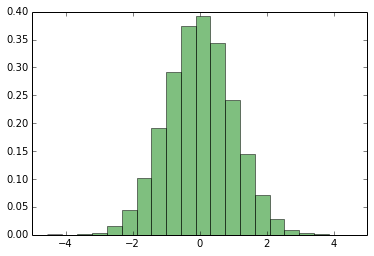

In [4]:

N = 100000 
p = [0.0 for k in range(N)]
p = drawp(N)
num_bins = 20
plt.figure(1)
plt.hist(p,num_bins, normed= 1.0, facecolor='green', alpha = 0.5)
plt.show()

### Leap Frog 

We will use leap frog approximation to evolve the system according to time.

In [5]:
def leap_frog(N,dt,ix,ip,np):
    
        ''' N : number of steps to evolve
            dt:  fraction of time ie T  = dt*N
            ix,ip : initial position and momentum
            np : number of the particles in the system
        '''
        ''' Returns
          x,p : final position and momentum'''   
    
    
        x = ix
        p = ip
        k = 0
        while k < N:
            if k == 0:
                    for i in range(np):
                        p[i] = p[i] - ((dt/2.0)*x[i])
            elif k > 0 :
                    if k < N - 1:
                        for i in range(np):   
                            x[i] = x[i] + (dt*p[i])
                            p[i] =   p[i] - (dt*x[i])
                            #S1 = hamiltonian(x,p,np)
                            #print "k =",k,"S1=",S1
                            
            elif k == N - 1:
                          for i in range(np): 
                            p[i] = (p[i] - (dt/2.0)*x[i])
                       
            k = k+1
        return x,p

### HMC

Here we run the HMC - simulation

In [6]:
def HMC(np,N,dt,steps,x0):
    
    ''' np : number of particles in the system
        N = number of steps in Leap - Frog
        dt = fraction of time in Leap - Frog
        steps: total steps in HMC '''
    
    
       
    xt = [0.0 for k in range(np)]
    pt = [0.0 for k in range(np)]

    
    p0 = drawp(np)
    H = [0.0 for k in range(steps)]
       
    S0 = hamiltonian(x0,p0,np)
    print "=======>", 0,"S0=", S0



    chain = 1
    total_frac =  0.0
    while chain < steps:
        s_stor = [0.0]
        xt,pt = leap_frog(N,dt,x0,p0,np)
        S1 = hamiltonian(xt,pt,np)
        frac = math.exp(-(S1-S0))
        #print frac
        a = min(1,frac)
        b = random.uniform(0.0,1.0)

        if b < a:
            print "=======>", chain, "S1=",S1,frac,a,b
            H[chain] = S1
            x0 = xt
            p0 = drawp(np)
            S0 = hamiltonian(x0,p0,np)
        else:
            H[chain] = S0
            p0 = drawp(np)
            
        chain = chain+1
            
    return H   

### Run HMC

Steps to run

### Seting Constants

In [8]:
np = 1000
N = 1000
dt = 0.001
steps = 100

Call HMC

In [10]:
x0 = [1.0 for k in range(np)]
x0 = [random.uniform(0.0,1.0) for k in range(np)]
H = HMC(np,N,dt,steps,x0)  

=======> 0 S0= 634.329642425
=======> 1 S1= 634.176644431 1.1653226407 1 0.733718825241
=======> 2 S1= 860.433247645 1.04820040462 1 0.118879577619
=======> 3 S1= 959.0880056 1.02823941879 1 0.494715009236
=======> 4 S1= 995.098781516 1.00201905305 1 0.26041376277
=======> 5 S1= 1014.46067223 0.996173462387 0.996173462387 0.973534507459
=======> 6 S1= 1060.1975905 1.00650260273 1 0.0433863045125
=======> 7 S1= 1056.67125783 1.0046068542 1 0.318541041274
=======> 8 S1= 1007.92542371 0.972470680716 0.972470680716 0.641673826227
=======> 9 S1= 1019.45210409 0.999868096288 0.999868096288 0.673753652179
=======> 10 S1= 1033.75761347 1.01455345167 1 0.904224474449
=======> 11 S1= 1039.33277255 1.00067885822 1 0.922841618884
=======> 12 S1= 977.786623826 0.969824483296 0.969824483296 0.0534599327409
=======> 13 S1= 982.135607524 0.981771694716 0.981771694716 0.0888855631239
=======> 14 S1= 984.434076216 1.00314168125 1 0.900050557869
=======> 15 S1= 979.489618274 1.00009113341 1 0.65844667362

### Plot

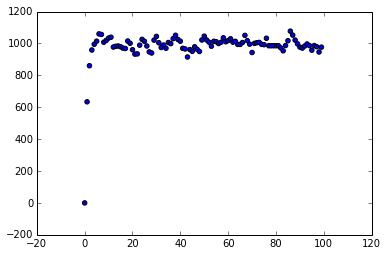

In [11]:
t = [1.0*k for k in range (steps)] 
plt.figure(12)
plt.scatter(t,H)
plt.show()